In [1]:
# -*- coding: utf-8 -*-

import meep as mp
import numpy as np
import matplotlib.pyplot as plt

resolution = 20                    # pixels/μm

eps = 13                           # dielectric constant of waveguide
w = 1.2                            # width of waveguide
r = 0.36                           # radius of holes
d = 1.4                            # defect spacing (ordinary spacing = 1)
N = 3                              # number of holes on either side of defect

sy = 6                             # size of cell in y direction (perpendicular to wvg.)
pad = 2                            # padding between last hole and PML edge
dpml = 1                           # PML thickness
sx = 2*(pad+dpml+N)+d-1            # size of cell in x direction

cell = mp.Vector3(sx, sy, 0)
pml_layers = mp.PML(dpml)

geometry = [mp.Block(center=mp.Vector3(),
                     size=mp.Vector3(mp.inf, w, mp.inf),
                     material=mp.Medium(epsilon=eps))]

for i in range(N):
    geometry.append(mp.Cylinder(r, center=mp.Vector3(0.5*d+i)))
    geometry.append(mp.Cylinder(r, center=mp.Vector3(-0.5*d-i)))

fcen = 0.25                        # pulse center frequency
df = 0.2                           # pulse width (in frequency)

sources = mp.Source(src=mp.GaussianSource(fcen, fwidth=df), component=mp.Hz, center=mp.Vector3())

symmetries = [mp.Mirror(mp.X, phase=-1),
              mp.Mirror(mp.Y, phase=-1)]

sim = mp.Simulation(cell_size=cell,
                    geometry=geometry,
                    sources=[sources],
                    symmetries=symmetries,
                    boundary_layers=[pml_layers],
                    resolution=resolution)

d1 = 0.2

nearfield = sim.add_near2far(fcen, 0, 1,
    mp.Near2FarRegion(mp.Vector3(y=0.5*w+d1), size=mp.Vector3(sx-2*dpml)),
    mp.Near2FarRegion(mp.Vector3(-0.5*sx+dpml,0.5*w+0.5*d1), size=mp.Vector3(y=d1), weight=-1.0),
    mp.Near2FarRegion(mp.Vector3(0.5*sx-dpml,0.5*w+0.5*d1), size=mp.Vector3(y=d1)))

sim.run(until_after_sources=mp.stop_when_fields_decayed(50, mp.Hz, mp.Vector3(0.12,-0.37), 1e-8))

-----------
Initializing structure...
field decay(t = 50.025000000000006): 61.714437239634854 / 61.714437239634854 = 1.0
field decay(t = 100.05000000000001): 47.39669513065221 / 61.714437239634854 = 0.7680001187827836
field decay(t = 150.07500000000002): 38.753487484300784 / 61.714437239634854 = 0.6279484868965497
field decay(t = 200.10000000000002): 31.933885594488228 / 61.714437239634854 = 0.517445949810579
field decay(t = 250.125): 26.076764607720868 / 61.714437239634854 = 0.42253912980630065
field decay(t = 300.15000000000003): 21.47655605320123 / 61.714437239634854 = 0.34799889643015885
field decay(t = 350.175): 17.53631126728562 / 61.714437239634854 = 0.2841524941593938
field decay(t = 400.20000000000005): 14.443563832839763 / 61.714437239634854 = 0.2340386541443446
field decay(t = 450.225): 11.896373926780527 / 61.714437239634854 = 0.19276484496791815
field decay(t = 500.25): 9.718573927428102 / 61.714437239634854 = 0.15747650569495178
field decay(t = 550.275): 8.004609807436562

field decay(t = 4352.175): 2.3504340518958436e-06 / 61.714437239634854 = 3.8085643441407335e-08
field decay(t = 4402.2): 1.919486550538664e-06 / 61.714437239634854 = 3.110271496255195e-08
field decay(t = 4452.225): 1.5810178663207582e-06 / 61.714437239634854 = 2.5618282156276092e-08
field decay(t = 4502.25): 1.3020179000714368e-06 / 61.714437239634854 = 2.1097460469675026e-08
field decay(t = 4552.275000000001): 1.0629751847546947e-06 / 61.714437239634854 = 1.7224092648324764e-08
field decay(t = 4602.3): 8.756223798546496e-07 / 61.714437239634854 = 1.418829076338557e-08
field decay(t = 4652.325): 7.15412237809199e-07 / 61.714437239634854 = 1.1592299465217191e-08
field decay(t = 4702.35): 5.892719179602837e-07 / 61.714437239634854 = 9.548364115711901e-09
run 0 finished at t = 4702.35 (188094 timesteps)


(-0.5, 207.5, 79.5, -0.5)

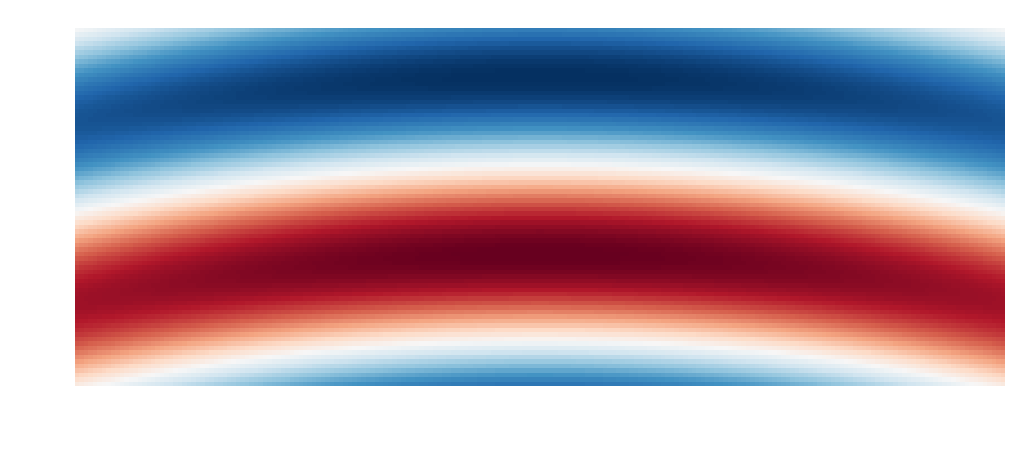

In [2]:
d2 = 20
h = 4

ff = sim.get_farfields(nearfield, resolution, center=mp.Vector3(y=0.5*w+d2+0.5*h), size=mp.Vector3(sx-2*dpml,h))

plt.figure(dpi=200)
plt.imshow(np.rot90(np.real(ff['Hz']),1),cmap='RdBu')
plt.axis('off')